In [1]:
# Import packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
%cd

/Users/vivi


In [4]:
import os
os.chdir('/Users/vivi/Desktop/Deloitte/cluster.4.14.22 2')

In [5]:
%pwd

'/Users/vivi/Desktop/Deloitte/cluster.4.14.22 2'

In [6]:
df = pd.read_csv('Master_Dataset.csv') #load data

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,id,CAMIS,name,is_closed,review_count,rating,transactions,Price,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,Latitude,Longitude,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,MEDIAN SCORE,LATEST SCORE,AVG. SCORE,BINNED_Avg.CritFine,TOTAL CRITICAL FINE,Avg.CritFine,LATEST INSPECTION DATE,LATEST INSPECTION YEAR,text_join,rating_min,rating_max,rating_mean,Reviews_Flag,Reviews_Flag_Count,Revenue_Insp_Year,Paid_Wages,Cuisine Category
0,AgAkUVLN_axMY-bzbNCfCw,40983698,Yuca Bar,False,1902,4.0,"['delivery', 'pickup']",2,YUCA BAR & RESTAURANT,Manhattan,10009,2129829533,Latin American,40.726143,-73.983476,63717.0,16174853.0,2.0,5.0,14.5,7,14.500000,1,2100,1050.0,8/26/21,2021,my coworker & i were trying to find a good spo...,2,5,4.000000,True,2,89343,10446901184,South American
1,rDqIGNlSpQXv5W1mpKnJeg,50096379,El Gallo Negro 2,False,43,3.5,"['delivery', 'pickup']",0,EL GALLO NEGRO 2,Queens,11356,9292007770,Mexican,40.786272,-73.835992,61859.0,22721487.0,1.0,1.0,11.0,11,11.000000,1,800,800.0,3/9/20,2020,the salad bar is everything!!! this place is...,2,5,3.666667,True,2,87211,10318151036,South American
2,QGNhNw5lbzTtH8bkNl41BQ,41264387,Cuenca Coffee Shop,False,5,4.0,['delivery'],0,CUENCA COFFEE SHOP RESTAURANT,Queens,11421,7188474642,Latin American,40.694442,-73.849468,73107.0,22721487.0,1.0,1.0,12.0,12,12.000000,1,750,750.0,2/11/20,2020,what a great little find! good for a large gro...,1,5,2.666667,True,1,87211,10318151036,South American
3,mnEMipzEekqLWIogjAB_zA,41650474,Subway,False,9,2.5,"['pickup', 'delivery']",1,SUBWAY,Brooklyn,11217,7182307703,Sandwiches,40.684430,-73.977725,119375.0,25604184.0,1.5,1.5,10.0,10,10.333333,1,2100,1400.0,8/12/21,2021,"truly a staple of the queens community, friend...",3,5,4.000000,False,0,89343,10446901184,Universal
4,mnEMipzEekqLWIogjAB_zA,41650474,Subway,False,9,2.5,"['delivery', 'pickup']",1,SUBWAY,Brooklyn,11217,7182307703,Sandwiches,40.684430,-73.977725,119375.0,25604184.0,1.5,1.5,10.0,10,10.333333,1,2100,1400.0,8/12/21,2021,"truly a staple of the queens community, friend...",3,5,4.000000,False,0,89343,10446901184,Universal


In [8]:
df = df.drop_duplicates(subset='CAMIS') #use unique restaurants

In [9]:
pd.set_option('display.max_columns', None) # getting the full columns
df.head()

,id,CAMIS,name,is_closed,review_count,rating,transactions,Price,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,Latitude,Longitude,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,MEDIAN SCORE,LATEST SCORE,AVG. SCORE,BINNED_Avg.CritFine,TOTAL CRITICAL FINE,Avg.CritFine,LATEST INSPECTION DATE,LATEST INSPECTION YEAR,text_join,rating_min,rating_max,rating_mean,Reviews_Flag,Reviews_Flag_Count,Revenue_Insp_Year,Paid_Wages,Cuisine Category
0,AgAkUVLN_axMY-bzbNCfCw,40983698,Yuca Bar,False,1902,4.0,"['delivery', 'pickup']",2,YUCA BAR & RESTAURANT,Manhattan,10009,2129829533,Latin American,40.726143,-73.983476,63717.0,16174853.0,2.0,5.0,14.5,7,14.500000,1,2100,1050.0,8/26/21,2021,my coworker & i were trying to find a good spo...,2,5,4.000000,True,2,89343,10446901184,South American
1,rDqIGNlSpQXv5W1mpKnJeg,50096379,El Gallo Negro 2,False,43,3.5,"['delivery', 'pickup']",0,EL GALLO NEGRO 2,Queens,11356,9292007770,Mexican,40.786272,-73.835992,61859.0,22721487.0,1.0,1.0,11.0,11,11.000000,1,800,800.0,3/9/20,2020,the salad bar is everything!!! this place is...,2,5,3.666667,True,2,87211,10318151036,South American
2,QGNhNw5lbzTtH8bkNl41BQ,41264387,Cuenca Coffee Shop,False,5,4.0,['delivery'],0,CUENCA COFFEE SHOP RESTAURANT,Queens,11421,7188474642,Latin American,40.694442,-73.849468,73107.0,22721487.0,1.0,1.0,12.0,12,12.000000,1,750,750.0,2/11/20,2020,what a great little find! good for a large gro...,1,5,2.666667,True,1,87211,10318151036,South American
3,mnEMipzEekqLWIogjAB_zA,41650474,Subway,False,9,2.5,"['pickup', 'delivery']",1,SUBWAY,Brooklyn,11217,7182307703,Sandwiches,40.684430,-73.977725,119375.0,25604184.0,1.5,1.5,10.0,10,10.333333,1,2100,1400.0,8/12/21,2021,"truly a staple of the queens community, friend...",3,5,4.000000,False,0,89343,10446901184,Universal
6,2l6f0IXKZkxyq0L4EaoaFQ,41678685,The Butcher's Daughter,False,1295,3.5,"['pickup', 'delivery']",2,THE BUTCHER'S DAUGHTER,Manhattan,10012,2122193434,Vegetarian,40.720534,-73.994682,106467.0,16174853.0,1.0,NaN,9.0,9,9.000000,1,800,800.0,2/5/20,2020,we have been in the neighborhood for a few yea...,3,5,4.333333,False,0,87211,10318151036,Universal


#### Performing Data Exploration

In [10]:
# Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6646 entries, 0 to 7030
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6646 non-null   object 
 1   CAMIS                   6646 non-null   int64  
 2   name                    6646 non-null   object 
 3   is_closed               6646 non-null   bool   
 4   review_count            6646 non-null   int64  
 5   rating                  6646 non-null   float64
 6   transactions            6646 non-null   object 
 7   Price                   6646 non-null   int64  
 8   DBA                     6646 non-null   object 
 9   BORO                    6646 non-null   object 
 10  ZIPCODE                 6646 non-null   int64  
 11  PHONE                   6646 non-null   object 
 12  CUISINE DESCRIPTION     6646 non-null   object 
 13  Latitude                6640 non-null   float64
 14  Longitude               6640 non-null   

In [11]:
# Explore the data
pd.set_option('display.max_columns', None) # getting the full columns
df.head()

,id,CAMIS,name,is_closed,review_count,rating,transactions,Price,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,Latitude,Longitude,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,MEDIAN SCORE,LATEST SCORE,AVG. SCORE,BINNED_Avg.CritFine,TOTAL CRITICAL FINE,Avg.CritFine,LATEST INSPECTION DATE,LATEST INSPECTION YEAR,text_join,rating_min,rating_max,rating_mean,Reviews_Flag,Reviews_Flag_Count,Revenue_Insp_Year,Paid_Wages,Cuisine Category
0,AgAkUVLN_axMY-bzbNCfCw,40983698,Yuca Bar,False,1902,4.0,"['delivery', 'pickup']",2,YUCA BAR & RESTAURANT,Manhattan,10009,2129829533,Latin American,40.726143,-73.983476,63717.0,16174853.0,2.0,5.0,14.5,7,14.500000,1,2100,1050.0,8/26/21,2021,my coworker & i were trying to find a good spo...,2,5,4.000000,True,2,89343,10446901184,South American
1,rDqIGNlSpQXv5W1mpKnJeg,50096379,El Gallo Negro 2,False,43,3.5,"['delivery', 'pickup']",0,EL GALLO NEGRO 2,Queens,11356,9292007770,Mexican,40.786272,-73.835992,61859.0,22721487.0,1.0,1.0,11.0,11,11.000000,1,800,800.0,3/9/20,2020,the salad bar is everything!!! this place is...,2,5,3.666667,True,2,87211,10318151036,South American
2,QGNhNw5lbzTtH8bkNl41BQ,41264387,Cuenca Coffee Shop,False,5,4.0,['delivery'],0,CUENCA COFFEE SHOP RESTAURANT,Queens,11421,7188474642,Latin American,40.694442,-73.849468,73107.0,22721487.0,1.0,1.0,12.0,12,12.000000,1,750,750.0,2/11/20,2020,what a great little find! good for a large gro...,1,5,2.666667,True,1,87211,10318151036,South American
3,mnEMipzEekqLWIogjAB_zA,41650474,Subway,False,9,2.5,"['pickup', 'delivery']",1,SUBWAY,Brooklyn,11217,7182307703,Sandwiches,40.684430,-73.977725,119375.0,25604184.0,1.5,1.5,10.0,10,10.333333,1,2100,1400.0,8/12/21,2021,"truly a staple of the queens community, friend...",3,5,4.000000,False,0,89343,10446901184,Universal
6,2l6f0IXKZkxyq0L4EaoaFQ,41678685,The Butcher's Daughter,False,1295,3.5,"['pickup', 'delivery']",2,THE BUTCHER'S DAUGHTER,Manhattan,10012,2122193434,Vegetarian,40.720534,-73.994682,106467.0,16174853.0,1.0,NaN,9.0,9,9.000000,1,800,800.0,2/5/20,2020,we have been in the neighborhood for a few yea...,3,5,4.333333,False,0,87211,10318151036,Universal


In [12]:

#necessary = ['CAMIS','review_count','rating','Price','ZIPCODE','MEDIAN INCOME','TOTAL POPULATION','INSP FREQ',
             #'Critic FREQ','LATEST SCORE']
            
df = df[['CAMIS','DBA','review_count','rating','Price','BORO','Cuisine Category','ZIPCODE','MEDIAN INCOME','TOTAL POPULATION','INSP FREQ',
           'Crit FREQ','LATEST SCORE','Reviews_Flag']]
df.head()

,CAMIS,DBA,review_count,rating,Price,BORO,Cuisine Category,ZIPCODE,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,LATEST SCORE,Reviews_Flag
0,40983698,YUCA BAR & RESTAURANT,1902,4.0,2,Manhattan,South American,10009,63717.0,16174853.0,2.0,5.0,7,True
1,50096379,EL GALLO NEGRO 2,43,3.5,0,Queens,South American,11356,61859.0,22721487.0,1.0,1.0,11,True
2,41264387,CUENCA COFFEE SHOP RESTAURANT,5,4.0,0,Queens,South American,11421,73107.0,22721487.0,1.0,1.0,12,True
3,41650474,SUBWAY,9,2.5,1,Brooklyn,Universal,11217,119375.0,25604184.0,1.5,1.5,10,False
6,41678685,THE BUTCHER'S DAUGHTER,1295,3.5,2,Manhattan,Universal,10012,106467.0,16174853.0,1.0,NaN,9,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6646 entries, 0 to 7030
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CAMIS             6646 non-null   int64  
 1   DBA               6646 non-null   object 
 2   review_count      6646 non-null   int64  
 3   rating            6646 non-null   float64
 4   Price             6646 non-null   int64  
 5   BORO              6646 non-null   object 
 6   Cuisine Category  6611 non-null   object 
 7   ZIPCODE           6646 non-null   int64  
 8   MEDIAN INCOME     6498 non-null   float64
 9   TOTAL POPULATION  6646 non-null   float64
 10  INSP FREQ         6646 non-null   float64
 11  Crit FREQ         6141 non-null   float64
 12  LATEST SCORE      6646 non-null   int64  
 13  Reviews_Flag      6646 non-null   bool   
dtypes: bool(1), float64(5), int64(5), object(3)
memory usage: 733.4+ KB


In [14]:
unnecessary = ["CAMIS", "DBA"]

feature_name = df.columns.to_list()
for col in unnecessary:
    feature_name.remove(col)
        
cat_feat=[]
for feat in feature_name:
    if df[feat].dtypes == 'O' or df[feat].dtypes == 'bool': #Obeject and Bool
        cat_feat.append(feat)

cont_feat=["MEDIAN INCOME","TOTAL POPULATION","INSP FREQ","Crit FREQ","LATEST SCORE","review_count","Price", "rating"]

In [15]:
cat_feat

['BORO', 'Cuisine Category', 'Reviews_Flag']

In [16]:
df.isnull().sum(axis=0)

CAMIS                 0
DBA                   0
review_count          0
rating                0
Price                 0
BORO                  0
Cuisine Category     35
ZIPCODE               0
MEDIAN INCOME       148
TOTAL POPULATION      0
INSP FREQ             0
Crit FREQ           505
LATEST SCORE          0
Reviews_Flag          0
dtype: int64

In [17]:
df = df.dropna()
df.isnull().sum(axis=0)

CAMIS               0
DBA                 0
review_count        0
rating              0
Price               0
BORO                0
Cuisine Category    0
ZIPCODE             0
MEDIAN INCOME       0
TOTAL POPULATION    0
INSP FREQ           0
Crit FREQ           0
LATEST SCORE        0
Reviews_Flag        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5972 entries, 0 to 7030
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CAMIS             5972 non-null   int64  
 1   DBA               5972 non-null   object 
 2   review_count      5972 non-null   int64  
 3   rating            5972 non-null   float64
 4   Price             5972 non-null   int64  
 5   BORO              5972 non-null   object 
 6   Cuisine Category  5972 non-null   object 
 7   ZIPCODE           5972 non-null   int64  
 8   MEDIAN INCOME     5972 non-null   float64
 9   TOTAL POPULATION  5972 non-null   float64
 10  INSP FREQ         5972 non-null   float64
 11  Crit FREQ         5972 non-null   float64
 12  LATEST SCORE      5972 non-null   int64  
 13  Reviews_Flag      5972 non-null   bool   
dtypes: bool(1), float64(5), int64(5), object(3)
memory usage: 659.0+ KB


## Distribution of Latest Score

array([[<AxesSubplot:title={'center':'LATEST SCORE'}>]], dtype=object)

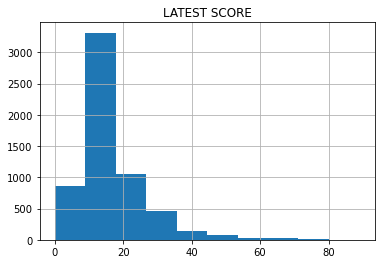

In [19]:
df.hist(column="LATEST SCORE")


* "A" grade: 0 to 13 points for sanitary violations
* "B" grade: 14 to 27 points for sanitary violations
* "C" grade: 28 or more points for sanitary violations

### We can see more than 50% restaurants are low risk

### Let's focus on high risk restaurants - > 14 (median score of 'LATEST SCORE' is 12, 14 and above means Grade B or C)

In [20]:
df = df[(df['LATEST SCORE'] >= 14)]

## remove unnecessary columns to see correlation on Median Score

In [21]:
unnecessary = ["CAMIS", "DBA"]
df_corr = df.drop(unnecessary,axis =1)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 9 to 7030
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_count      2169 non-null   int64  
 1   rating            2169 non-null   float64
 2   Price             2169 non-null   int64  
 3   BORO              2169 non-null   object 
 4   Cuisine Category  2169 non-null   object 
 5   ZIPCODE           2169 non-null   int64  
 6   MEDIAN INCOME     2169 non-null   float64
 7   TOTAL POPULATION  2169 non-null   float64
 8   INSP FREQ         2169 non-null   float64
 9   Crit FREQ         2169 non-null   float64
 10  LATEST SCORE      2169 non-null   int64  
 11  Reviews_Flag      2169 non-null   bool   
dtypes: bool(1), float64(5), int64(4), object(2)
memory usage: 205.5+ KB


In [22]:
# encode categorical variables
for col in cat_feat:
    df_corr[col] = df_corr[col].astype('category').cat.codes

In [23]:
df_corr_cont = df_corr[cont_feat]

### features are not correlated

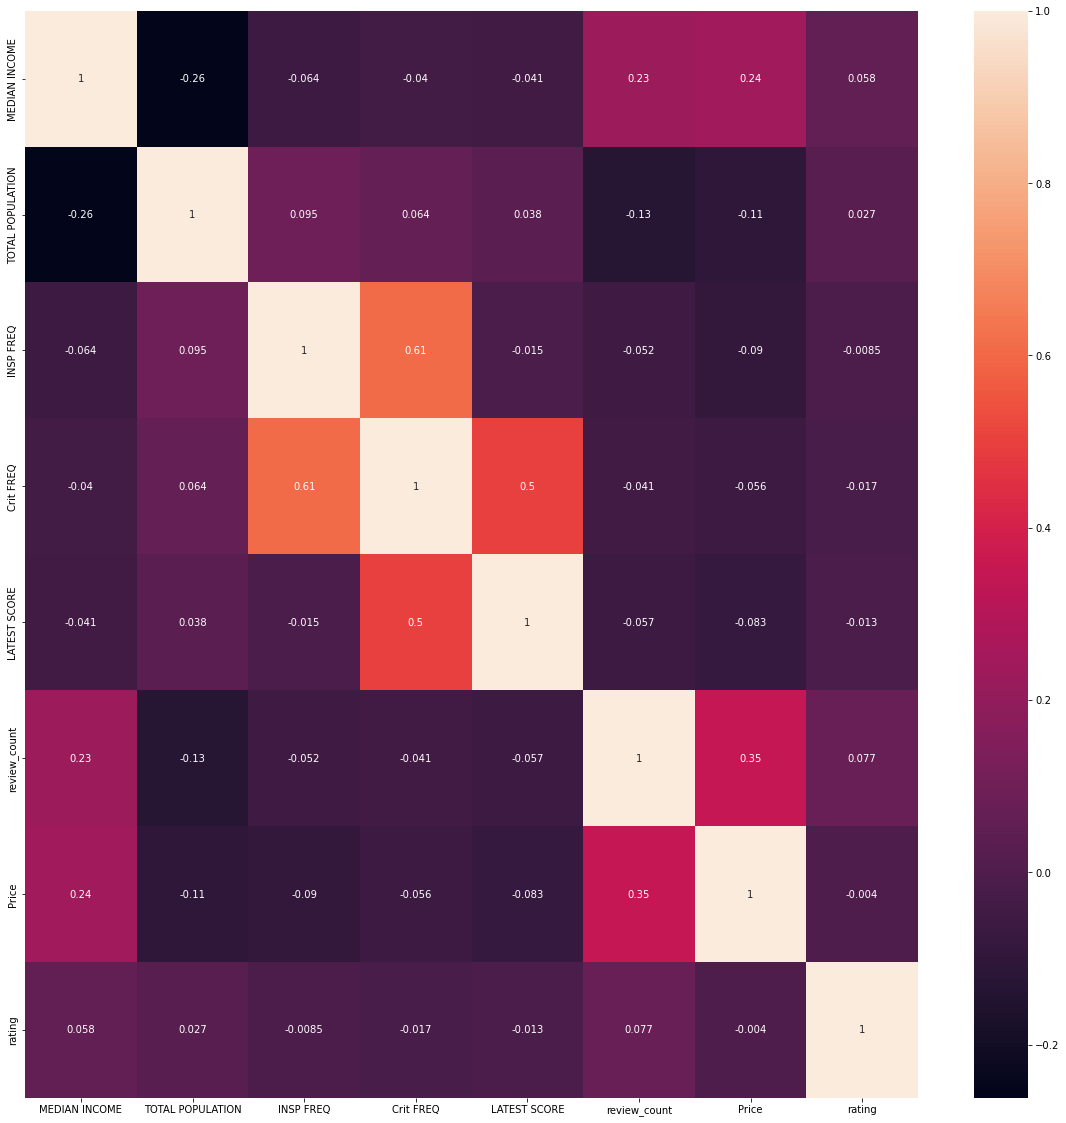

In [24]:
df_corr_impact_action_yn_2 = df_corr_cont.corr()
#set fig size
fig, ax = plt.subplots(figsize=(20,20))
#plot matrix
sn.heatmap(df_corr_impact_action_yn_2, annot=True)
plt.show();

### ---------------

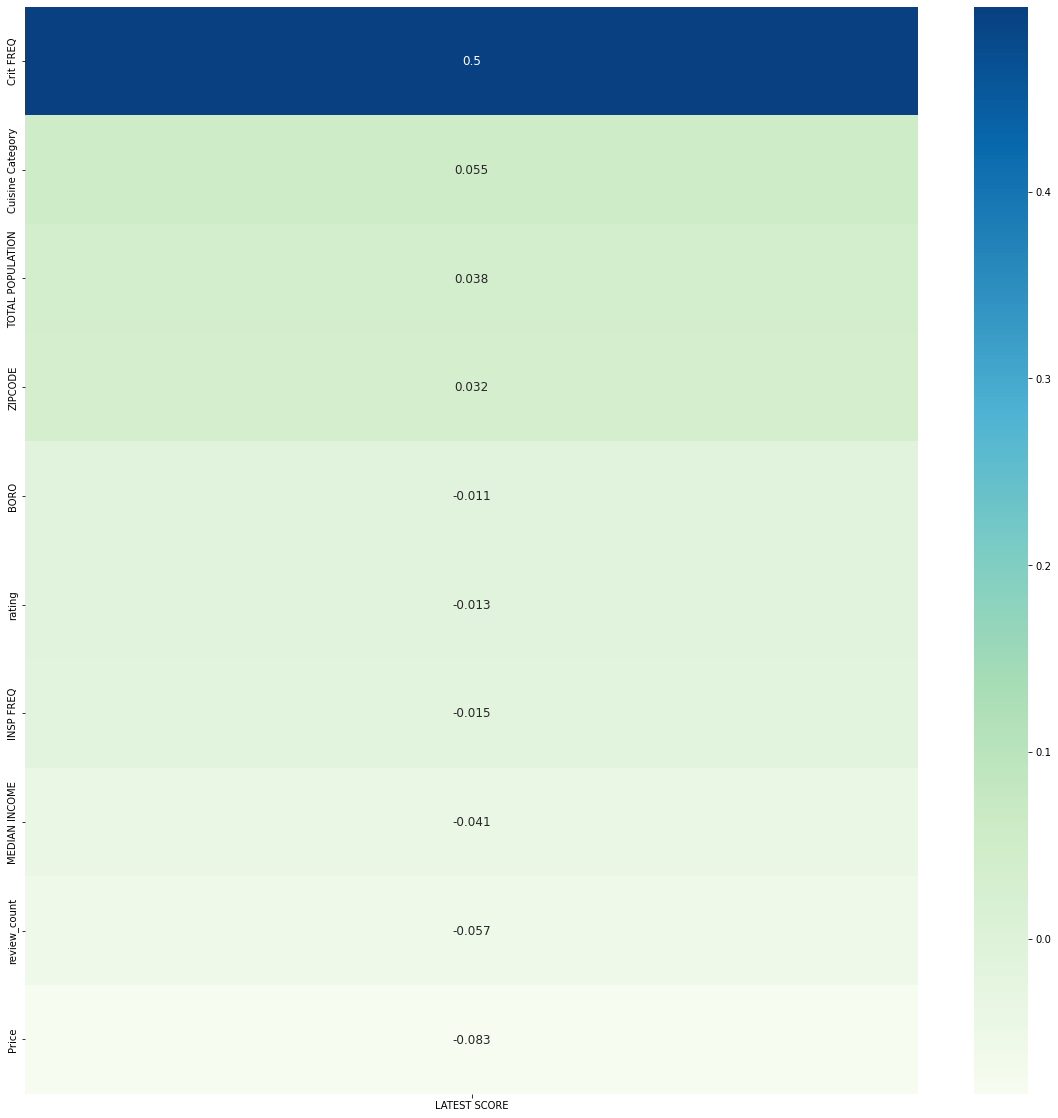

In [25]:
df_corr_impact_action_yn = df_corr[df_corr.columns[0:11]].corr()['LATEST SCORE'][:-1]
#set fig size
fig, ax = plt.subplots(figsize=(20,20))
#plot matrix
sn.heatmap(df_corr_impact_action_yn.to_frame().sort_values(by=['LATEST SCORE'],ascending= False),annot=True, annot_kws={'size':12},cmap="GnBu")
plt.show();


### ---------------

### Highly Positive Impacted Features : Crit Freq, Cuisine Category, Total Population
### Highly Negative Impacted Features : Rating, Price, Median Income

In [26]:
cor = df_corr[df_corr.columns[0:11]].corr()['LATEST SCORE'][:-1]
cor.sort_values()

#Price and rating higher, risk score lower
#Critical Freq higher, risk higher

Price              -0.083133
review_count       -0.057130
MEDIAN INCOME      -0.041043
INSP FREQ          -0.015452
rating             -0.012605
BORO               -0.010857
ZIPCODE             0.031850
TOTAL POPULATION    0.037522
Cuisine Category    0.054663
Crit FREQ           0.499012
Name: LATEST SCORE, dtype: float64

## Normalizing the features

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_ = pd.DataFrame(scaler.fit_transform(df_corr[cont_feat]), columns = cont_feat)
scaled_.head()

,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,LATEST SCORE,review_count,Price,rating
0,-0.169376,1.189558,-0.336195,0.39789,0.126885,-0.283303,-0.488416,0.458184
1,0.218069,1.189558,-0.336195,1.61599,2.055504,2.875236,0.654382,0.458184
2,-0.828775,0.619636,1.192541,1.00694,-0.837424,-0.523382,0.654382,-1.817695
3,-0.818400,0.619636,-0.336195,-0.21116,-0.355270,-0.563395,-1.631213,-1.059069
4,-1.525252,1.189558,-0.336195,-0.21116,0.126885,0.016796,0.654382,-1.817695


In [28]:
scaled_df = pd.concat([scaled_, df_corr[cat_feat].reset_index(drop=True)], axis=1)

In [29]:
scaled_df.head()

,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,LATEST SCORE,review_count,Price,rating,BORO,Cuisine Category,Reviews_Flag
0,-0.169376,1.189558,-0.336195,0.39789,0.126885,-0.283303,-0.488416,0.458184,1,10,0
1,0.218069,1.189558,-0.336195,1.61599,2.055504,2.875236,0.654382,0.458184,1,1,0
2,-0.828775,0.619636,1.192541,1.00694,-0.837424,-0.523382,0.654382,-1.817695,3,10,0
3,-0.818400,0.619636,-0.336195,-0.21116,-0.355270,-0.563395,-1.631213,-1.059069,3,1,0
4,-1.525252,1.189558,-0.336195,-0.21116,0.126885,0.016796,0.654382,-1.817695,1,4,1


In [30]:
scaled_df.describe()

,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,LATEST SCORE,review_count,Price,rating,BORO,Cuisine Category,Reviews_Flag
count,2.169000e+03,2.169000e+03,2.169000e+03,2.169000e+03,2.169000e+03,2.169000e+03,2.169000e+03,2.169000e+03,2169.000000,2169.000000,2169.000000
mean,-1.028837e-17,-3.940294e-16,2.351994e-16,-1.417953e-15,-3.197074e-16,-8.189750e-19,-4.985510e-17,-4.477234e-16,1.906870,5.137852,0.462886
std,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,0.932992,3.932888,0.498736
min,-1.740128e+00,-2.941249e+00,-3.361950e-01,-1.429260e+00,-1.126717e+00,-5.784004e-01,-1.631213e+00,-4.093574e+00,0.000000,0.000000,0.000000
25%,-8.183995e-01,-6.746637e-01,-3.361950e-01,-8.202097e-01,-6.445625e-01,-5.083773e-01,-4.884156e-01,-3.004426e-01,1.000000,2.000000,0.000000
50%,-1.985545e-01,-6.746637e-01,-3.361950e-01,-2.111598e-01,-2.588386e-01,-3.333197e-01,6.543821e-01,4.581837e-01,2.000000,4.000000,0.000000
75%,8.117953e-01,1.189558e+00,-3.361950e-01,3.978901e-01,4.161780e-01,7.681528e-02,6.543821e-01,4.581837e-01,3.000000,9.000000,1.000000
max,4.617261e+00,1.189558e+00,5.778749e+00,5.879339e+00,6.105604e+00,1.145806e+01,2.939978e+00,1.975436e+00,4.000000,12.000000,1.000000


In [31]:
scaled_df_new = scaled_df.copy()

In [32]:
scaled_df_cat = scaled_df[cat_feat]
scaled_df_cont = scaled_df[cont_feat]

scaled_df_dummy = pd.get_dummies(scaled_df_cat, drop_first = True) #dummies
scaled_df_new = pd.concat([scaled_df_cont, scaled_df_dummy], axis=1)

In [33]:
scaled_df_new.head()

,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,LATEST SCORE,review_count,Price,rating,BORO,Cuisine Category,Reviews_Flag
0,-0.169376,1.189558,-0.336195,0.39789,0.126885,-0.283303,-0.488416,0.458184,1,10,0
1,0.218069,1.189558,-0.336195,1.61599,2.055504,2.875236,0.654382,0.458184,1,1,0
2,-0.828775,0.619636,1.192541,1.00694,-0.837424,-0.523382,0.654382,-1.817695,3,10,0
3,-0.818400,0.619636,-0.336195,-0.21116,-0.355270,-0.563395,-1.631213,-1.059069,3,1,0
4,-1.525252,1.189558,-0.336195,-0.21116,0.126885,0.016796,0.654382,-1.817695,1,4,1


In [34]:
scaled_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MEDIAN INCOME     2169 non-null   float64
 1   TOTAL POPULATION  2169 non-null   float64
 2   INSP FREQ         2169 non-null   float64
 3   Crit FREQ         2169 non-null   float64
 4   LATEST SCORE      2169 non-null   float64
 5   review_count      2169 non-null   float64
 6   Price             2169 non-null   float64
 7   rating            2169 non-null   float64
 8   BORO              2169 non-null   int8   
 9   Cuisine Category  2169 non-null   int8   
 10  Reviews_Flag      2169 non-null   int8   
dtypes: float64(8), int8(3)
memory usage: 142.0 KB


### Using K-mean

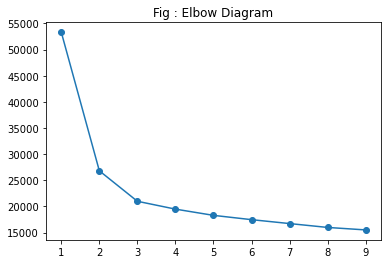

In [35]:
# Finding the Optimal Number of Clusters using Elbow Method
from sklearn.cluster import KMeans
cluster_range = range(1, 10) # We want the clusters to range from 1 to 10
cluster_errors_new = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_df_new)
    cluster_errors_new.append(clusters.inertia_)
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, cluster_errors_new, marker = "o");
plt.title("Fig : Elbow Diagram");

In [36]:
cluster_errors_new #checking error

[53312.23236514527,
 26815.136353383205,
 20988.597666050366,
 19487.69001371702,
 18296.972129318172,
 17474.36653729375,
 16727.314276377812,
 15986.801163888214,
 15513.112108207279]

In [37]:
scaled_array = scaled_df_new.to_numpy()

### Using K-Prototypes

In [38]:
from kmodes.kprototypes import KPrototypes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/3, moves: 0, ncost: 19295.49999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/3, moves: 0, ncost: 19295.49999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/3, moves: 0, ncost: 19295.49999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/3, moves: 0, ncost: 19295.49999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/3, moves: 0, ncost: 19295.49999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/3, moves: 0, ncost: 19295.49999999998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/3, moves: 0, ncost: 19295.49999999998
Init: initializing centroid

Run: 6, iteration: 2/3, moves: 319, ncost: 13296.265644159394
Run: 6, iteration: 3/3, moves: 357, ncost: 12778.545911281984
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/3, moves: 704, ncost: 12944.698455361118
Run: 7, iteration: 2/3, moves: 244, ncost: 12702.844365788767
Run: 7, iteration: 3/3, moves: 58, ncost: 12680.687331237137
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/3, moves: 619, ncost: 14170.921355248513
Run: 8, iteration: 2/3, moves: 414, ncost: 13593.499753387321
Run: 8, iteration: 3/3, moves: 372, ncost: 13136.481539559705
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/3, moves: 685, ncost: 13028.04610411585
Run: 9, iteration: 2/3, moves: 233, ncost: 12812.079500138165
Run: 9, iteration: 3/3, moves: 107, ncost: 12709.218792756543
Init: initializing centroids
Init: initializing clusters
Starting iterations...


Run: 7, iteration: 1/3, moves: 662, ncost: 11211.196749765353
Run: 7, iteration: 2/3, moves: 406, ncost: 10567.453259403012
Run: 7, iteration: 3/3, moves: 238, ncost: 10376.800986529239
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/3, moves: 747, ncost: 11119.325390447299
Run: 8, iteration: 2/3, moves: 341, ncost: 10657.152442963588
Run: 8, iteration: 3/3, moves: 270, ncost: 10344.53821090168
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/3, moves: 897, ncost: 10975.862529219145
Run: 9, iteration: 2/3, moves: 380, ncost: 10589.15588107367
Run: 9, iteration: 3/3, moves: 185, ncost: 10484.369451913053
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/3, moves: 809, ncost: 11903.890919947862
Run: 10, iteration: 2/3, moves: 587, ncost: 10469.993596992685
Run: 10, iteration: 3/3, moves: 234, ncost: 10260.277596601705
Best run was nu

Text(0.5, 1.0, 'Fig : Elbow Diagram')

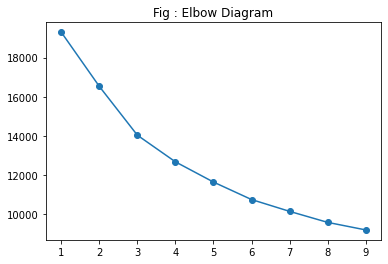

In [39]:
# Finding the Optimal Number of Clusters using Elbow Method
cat_feat_idx = [8,9,10]
cluster_range = range(1, 10) # We want the clusters to range from 1 to 10
cost = [] 
for num_clusters in cluster_range:
    clusters = KPrototypes(n_clusters = num_clusters, init='Huang', verbose=2, max_iter=3)
    clusters.fit(scaled_array, categorical=cat_feat_idx)
    cost.append(clusters.cost_)
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, cost, marker = "o");
plt.title("Fig : Elbow Diagram")

In [40]:
# K-prototypes error
cost

[19295.49999999998,
 16530.022190110474,
 14039.5787279412,
 12680.687331237137,
 11648.18232288015,
 10756.465442917162,
 10153.262743348745,
 9590.917200370537,
 9205.70371411228]

In [41]:
# K-means error
cluster_errors_new

[53312.23236514527,
 26815.136353383205,
 20988.597666050366,
 19487.69001371702,
 18296.972129318172,
 17474.36653729375,
 16727.314276377812,
 15986.801163888214,
 15513.112108207279]

### K-mean error < K-prototypes, hence, using k-mean for clustering

### -----------------------------------------------

## K-Prototypes

In [42]:
# clustering

kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=7)
kproto.fit(scaled_df.values, categorical=cat_feat_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/7, moves: 552, ncost: 15692.821323576247
Run: 1, iteration: 2/7, moves: 574, ncost: 14559.921445729502
Run: 1, iteration: 3/7, moves: 298, ncost: 14272.031208887065
Run: 1, iteration: 4/7, moves: 114, ncost: 14205.631580168689
Run: 1, iteration: 5/7, moves: 52, ncost: 14166.936152793978
Run: 1, iteration: 6/7, moves: 39, ncost: 14106.738003016702
Run: 1, iteration: 7/7, moves: 29, ncost: 14047.784000358859
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/7, moves: 267, ncost: 15557.330163145549
Run: 2, iteration: 2/7, moves: 194, ncost: 15229.999416452061
Run: 2, iteration: 3/7, moves: 344, ncost: 14694.60312362874
Run: 2, iteration: 4/7, moves: 258, ncost: 14408.316434562652
Run: 2, iteration: 5/7, moves: 210, ncost: 14217.0788085195
Run: 2, iteration: 6/7, moves: 156, ncost: 14084.215498928002
Run: 2, iteration: 7/7, moves: 71, ncost

KPrototypes(gamma=0.5, max_iter=7, n_clusters=3, verbose=2)

In [43]:
print(kproto.cluster_centroids_)

[[-0.56922843  0.50428054 -0.31477668 -0.18529381  0.06473703 -0.30494785
  -0.26525986 -0.03937418  1.          2.          0.        ]
 [ 0.85696146 -0.77853042 -0.31363068 -0.21715287 -0.08590343  0.47200377
   0.44212816  0.06160784  2.          1.          0.        ]
 [-0.21799438  0.2666208   2.87129306  1.81378883 -0.01911309 -0.16583468
  -0.26412822 -0.02393394  2.          2.          1.        ]]


In [44]:
dummy_feat = [feat for feat in scaled_df_new.columns.tolist() if feat not in cont_feat]

In [45]:
dummy_feat

['BORO', 'Cuisine Category', 'Reviews_Flag']

In [46]:
# clustering
clusters = kproto.predict(scaled_df.values, categorical=cat_feat_idx)
clusters

array([0, 1, 0, ..., 1, 0, 0], dtype=uint16)

In [47]:
reverse_ = pd.DataFrame(scaler.inverse_transform(scaled_df_new[cont_feat]), columns = cont_feat)
original_df = pd.concat([reverse_, scaled_df_new[dummy_feat]], axis=1)


In [49]:
# label instances with the clusterid
df['clusterid'] = list(clusters)

In [50]:
# SCORE by clusters
df.groupby('clusterid')['LATEST SCORE'].agg( ["median","mean", "sum", "min", "max"]).reset_index()

,clusterid,median,mean,sum,min,max
0,0,23.0,26.355517,30098,14,89
1,1,22.0,24.793358,20157,14,83
2,2,23.5,25.485981,5454,14,68


In [51]:
# grouping by clusters
df.groupby('clusterid').agg( ["mean"] ).reset_index()

,clusterid,CAMIS,review_count,rating,Price,ZIPCODE,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,LATEST SCORE,Reviews_Flag
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,4.671817e+07,110.345009,3.672067,1.195271,11022.069177,63541.929947,2.213801e+07,1.007005,3.042469,26.355517,0.458844
1,1,4.593820e+07,421.023370,3.738622,1.814268,10124.987700,114814.766298,1.564949e+07,1.007380,2.990160,24.793358,0.456335
2,2,4.797441e+07,165.971963,3.682243,1.196262,10818.504673,76169.116822,2.093592e+07,2.049065,6.324766,25.485981,0.509346


In [52]:
df.groupby('clusterid').agg( ["median","mean", "sum", "min", "max"]).reset_index()

clusterid       CAMIS                                                 \
                 median          mean          sum       min       max   
0         0  50039863.5  4.671817e+07  53352148326  40356483  50117434   
1         1  50010629.0  4.593820e+07  37347758379  40362715  50117350   
2         2  50073877.0  4.797441e+07  10266524666  40363427  50114244   

  review_count                               rating                         \
        median        mean     sum min   max median      mean     sum  min   
0         53.0  110.345009  126014   1  1295    3.5  3.672067  4193.5  1.0   
1        244.0  421.023370  342292   1  4814    4.0  3.738622  3039.5  1.0   
2         62.5  165.971963   35518   1  1694    4.0  3.682243   788.0  1.0   

        Price                          ZIPCODE                                 \
   max median      mean   sum min max   median          mean       sum    min   
0  5.0    1.0  1.195271  1365   0   3  11218.0  11022.069177  12587203  10001   
1  5.0    2.0  1.814268  1475   0   4  10018.0  10124.987700   8231615  10001   
2  5.0    1.0  1.196262   256   0   3  11207.0  10818.504673   2315160  10001   

         MEDIAN INCOME                                                \
     max        median           mean         sum      min       max   
0  11694       59820.0   63541.929947  72564884.0  21447.0  132091.0   
1  11414      118161.0  114814.766298  93344405.0  33720.0  250001.0   
2  11691       68530.0   76169.116822  16300191.0  21447.0  224063.0   

  TOTAL POPULATION                                                      \
            median          mean           sum         min         max   
0       22721487.0  2.213801e+07  2.528161e+10  14131491.0  25604184.0   
1       16174853.0  1.564949e+07  1.272304e+10   4710350.0  25604184.0   
2       22721487.0  2.093592e+07  4.480287e+09   4710350.0  25604184.0   

  INSP FREQ                             Crit FREQ                         \
     median      mean     sum  min  max    median      mean     sum  min   
0       1.0  1.007005  1150.0  1.0  1.5       3.0  3.042469  3474.5  1.0   
1       1.0  1.007380   819.0  1.0  2.0       3.0  2.990160  2431.0  1.0   
2       2.0  2.049065   438.5  1.5  3.0       6.0  6.324766  1353.5  2.0   

        LATEST SCORE                           Reviews_Flag                 \
    max       median       mean    sum min max       median      mean  sum   
0   8.0         23.0  26.355517  30098  14  89          0.0  0.458844  524   
1   8.0         22.0  24.793358  20157  14  83          0.0  0.456335  371   
2  13.0         23.5  25.485981   5454  14  68          1.0  0.509346  109   

                
     min   max  
0  False  True  
1  False  True  
2  False  True

### Cluster 0 has the highest lastest score
* least review_count
* lower rating
* lowest price
* lowest median income
* lowest Inspection Frequency

## -------------------------------------------------------

### Insights from cluster 0
* Brooklyn & Queen
* Asian & European

In [53]:
Focus = df[df.clusterid == 0 ]


In [54]:
Focus.head()

,CAMIS,DBA,review_count,rating,Price,BORO,Cuisine Category,ZIPCODE,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,LATEST SCORE,Reviews_Flag,clusterid
9,50004496,TAQUERIA EL PUENTE,119,4.0,1,Brooklyn,South American,11209,77917.0,25604184.0,1.0,4.0,27,False,0
16,50089369,ESTRELLA LATINA RESTAURANT,23,2.5,2,Queens,South American,11368,54211.0,22721487.0,1.5,5.0,17,False,0
17,40395375,ILDA'S PLACE II,7,3.0,0,Queens,American,11373,54584.0,22721487.0,1.0,3.0,22,False,0
18,50041401,FUSION EAST,239,2.5,2,Brooklyn,Caribbean,11239,29172.0,25604184.0,1.0,3.0,27,True,0
22,41604541,MUCHMORE'S,64,4.0,1,Brooklyn,Universal,11211,81228.0,25604184.0,1.0,2.0,21,False,0


In [55]:
Focus.groupby('BORO')['BORO'].count().rename("percentage").transform(lambda x: x/x.sum()).reset_index().sort_values(by=['percentage'])



,BORO,percentage
0,Bronx,0.100701
2,Manhattan,0.133975
3,Queens,0.363398
1,Brooklyn,0.401926


In [56]:
Focus.groupby('Cuisine Category')['Cuisine Category'].count().rename("percentage").transform(lambda x: x/x.sum()).reset_index().sort_values(by=['percentage'])


,Cuisine Category,percentage
3,Australian,0.000876
5,Eastern European,0.007881
0,African,0.008757
7,Mediterranean,0.008757
9,Other,0.013135
4,Caribbean,0.043783
8,Middle Eastern,0.045534
11,Sweets,0.056918
12,Universal,0.095447
10,South American,0.131349


# ----------------------------------------------------------------End (below is draft)

In [58]:
conda install -c conda-forge umap-learn

Solving environment: done

## Package Plan ##

  environment location: /Users/vivi/opt/anaconda3

  added / updated specs:
    - umap-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pynndescent-0.5.6          |     pyh6c4a22f_0          45 KB  conda-forge
    umap-learn-0.5.3           |   py39h6e9494a_0         132 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         177 KB

The following NEW packages will be INSTALLED:

  pynndescent        conda-forge/noarch::pynndescent-0.5.6-pyh6c4a22f_0
  umap-learn         conda-forge/osx-64::umap-learn-0.5.3-py39h6e9494a_0



pynndescent-0.5.6    | 45 KB     | ##################################### | 100% 
umap-learn-0.5.3     | 132 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing tran

In [62]:
 from sklearn.preprocessing import PowerTransformer

In [66]:
import umap

In [67]:
#Preprocessing numerical
numerical = df.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = df.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(df.select_dtypes(include='object').columns) / df.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False)

plt.figure(figsize=(20, 10))
plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


TypeError: simplicial_set_embedding() missing 2 required positional arguments: 'densmap_kwds' and 'output_dens'

## K-mean

In [102]:
# Creating the Clusters
k = 4
clusters = KMeans(k, random_state = 42)
clusters.fit(scaled_df_new)

KMeans(n_clusters=4, random_state=42)

In [110]:
dummy_feat = [feat for feat in scaled_df_new.columns.tolist() if feat not in cont_feat]

In [111]:
dummy_feat

['BORO_1', 'BORO_2', 'BORO_3', 'BORO_4', 'Reviews_Flag_True']

In [113]:
reverse_ = pd.DataFrame(scaler.inverse_transform(scaled_df_new[cont_feat]), columns = cont_feat)
original_df = pd.concat([reverse_, scaled_df_new[dummy_feat]], axis=1)
original_df["clusterid"] = clusters.labels_

df["clusterid"] = clusters.labels_

In [114]:
# Show cluster 0 restaurants
cluster_0 = df[df.clusterid == 0 ]
cluster_0

,CAMIS,name,review_count,rating,Price,BORO,CUISINE DESCRIPTION,ZIPCODE,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,LATEST SCORE,Reviews_Flag,clusterid
2,41264387,Cuenca Coffee Shop,5,4.0,0,Queens,Latin American,11421,73107.0,22721487.0,1.0,1.0,12,True,0
9,50004496,Taqueria El Puente,119,4.0,1,Brooklyn,Mexican,11209,77917.0,25604184.0,1.0,4.0,27,False,0
10,50089510,Rosa's Pizza,147,4.0,1,Brooklyn,Pizza,11211,81228.0,25604184.0,1.0,2.0,13,True,0
11,50100843,Square Pizza,29,4.5,0,Manhattan,Pizza,10002,36982.0,16174853.0,1.0,2.0,13,True,0
17,40395375,Ilda's Place II,7,3.0,0,Queens,American,11373,54584.0,22721487.0,1.0,3.0,22,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,41384605,Baldor Specialty Foods,12,4.0,0,Bronx,Caribbean,10474,22965.0,14131491.0,1.0,2.0,16,False,0
7018,50073971,Pho Che,438,4.0,2,Queens,Southeast Asian,11358,68848.0,22721487.0,1.0,2.0,12,True,0
7023,41720461,La Negra Restaurant,7,3.5,2,Queens,Spanish,11418,68920.0,22721487.0,1.0,1.0,12,True,0
7025,50074305,Northern King Dumpling - Wang Mandu,75,4.5,1,Queens,Chinese,11354,40786.0,22721487.0,1.0,2.0,15,True,0


In [115]:
# Get the total number of observations for cluster 0
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1581 entries, 2 to 7030
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CAMIS                1581 non-null   int64  
 1   name                 1581 non-null   object 
 2   review_count         1581 non-null   int64  
 3   rating               1581 non-null   float64
 4   Price                1581 non-null   int64  
 5   BORO                 1581 non-null   object 
 6   CUISINE DESCRIPTION  1581 non-null   object 
 7   ZIPCODE              1581 non-null   int64  
 8   MEDIAN INCOME        1581 non-null   float64
 9   TOTAL POPULATION     1581 non-null   float64
 10  INSP FREQ            1581 non-null   float64
 11  Crit FREQ            1581 non-null   float64
 12  LATEST SCORE         1581 non-null   int64  
 13  Reviews_Flag         1581 non-null   bool   
 14  clusterid            1581 non-null   int32  
dtypes: bool(1), float64(5), int32(1), int6

### ------------------------------------------------------------------------------------------------------------

In [116]:
df.groupby('clusterid').agg( ["mean"] ).reset_index()

,clusterid,CAMIS,review_count,rating,Price,ZIPCODE,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,LATEST SCORE,Reviews_Flag
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,4.664035e+07,127.956357,3.796648,1.241619,11087.029728,67239.292853,2.274871e+07,1.004744,1.956357,16.631246,0.474383
1,1,4.576399e+07,417.858776,3.739592,1.817959,10079.341224,113110.160000,1.509243e+07,1.006122,2.185306,17.957551,0.476735
2,2,4.709713e+07,145.205821,3.637214,1.176715,10762.197505,73203.043659,2.006387e+07,1.016632,4.440748,39.430353,0.446985
3,3,4.722096e+07,186.241379,3.679310,1.312644,10767.455172,83198.289655,2.077019e+07,2.037931,5.296552,18.321839,0.473563


In [122]:
df.groupby('clusterid').agg( ["median","mean", "sum", "min", "max"]).reset_index()

clusterid       CAMIS                                                 \
                 median          mean          sum       min       max   
0         0  50036711.0  4.664035e+07  73738393198  40356483  50117434   
1         1  50004269.0  4.576399e+07  56060893856  40362715  50117350   
2         2  50056923.0  4.709713e+07  22653719693  40371988  50116602   
3         3  50060017.0  4.722096e+07  20541118666  40363427  50116871   

  review_count                               rating                         \
        median        mean     sum min   max median      mean     sum  min   
0         63.0  127.956357  202299   1  1964    4.0  3.796648  6002.5  1.0   
1        228.0  417.858776  511877   1  6204    4.0  3.739592  4581.0  1.0   
2         59.0  145.205821   69844   1  2251    3.5  3.637214  1749.5  1.0   
3         75.0  186.241379   81015   1  2564    4.0  3.679310  1600.5  1.0   

        Price                          ZIPCODE                                 \
   max median      mean   sum min max   median          mean       sum    min   
0  5.0    1.0  1.241619  1963   0   4  11220.0  11087.029728  17528594  10001   
1  5.0    2.0  1.817959  2227   0   4  10018.0  10079.341224  12347193  10001   
2  5.0    1.0  1.176715   566   0   4  11201.0  10762.197505   5176617  10001   
3  5.0    2.0  1.312644   571   0   4  11204.0  10767.455172   4683843  10001   

         MEDIAN INCOME                                                 \
     max        median           mean          sum      min       max   
0  11697       63093.0   67239.292853  106305322.0  21447.0  132091.0   
1  11375      118161.0  113110.160000  138559946.0  33720.0  250001.0   
2  11694       66137.0   73203.043659   35210664.0  21447.0  179044.0   
3  11691       75340.0   83198.289655   36191256.0  21447.0  224063.0   

  TOTAL POPULATION                                                      \
            median          mean           sum         min         max   
0       22721487.0  2.274871e+07  3.596571e+10  14131491.0  25604184.0   
1       16174853.0  1.509243e+07  1.848823e+10   4710350.0  25604184.0   
2       22721487.0  2.006387e+07  9.650719e+09   4710350.0  25604184.0   
3       22721487.0  2.077019e+07  9.035032e+09   4710350.0  25604184.0   

  INSP FREQ                             Crit FREQ                         \
     median      mean     sum  min  max    median      mean     sum  min   
0       1.0  1.004744  1588.5  1.0  1.5       2.0  1.956357  3093.0  1.0   
1       1.0  1.006122  1232.5  1.0  2.0       2.0  2.185306  2677.0  1.0   
2       1.0  1.016632   489.0  1.0  2.0       4.0  4.440748  2136.0  1.0   
3       2.0  2.037931   886.5  1.5  3.0       5.0  5.296552  2304.0  1.0   

        LATEST SCORE                           Reviews_Flag                 \
    max       median       mean    sum min max       median      mean  sum   
0   4.5         13.0  16.631246  26294  12  36          0.0  0.474383  750   
1   5.0         16.0  17.957551  21998  12  48          0.0  0.476735  584   
2  13.0         36.0  39.430353  18966  21  89          0.0  0.446985  215   
3  13.0         13.0  18.321839   7970  12  52          0.0  0.473563  206   

                
     min   max  
0  False  True  
1  False  True  
2  False  True  
3  False  True

* Cluster 2 has the highest score - the most risky cluster
* smallest mean of price, rating, review_count, matches to our correlation map

### ------------------------------------------------------------------------------------------------------------

### ----------------------------------------NLP------------------------------------------------

In [83]:
review = {"review":["alxis is awsome and yang is fantastic", "John is 3bad", "Ding is worse and bad123", 
                "lily is awsome and fantastic", "the food is fantastic~", "the can *is baD and Bad"],
          "rating":[5, 2, 1, 4, 4, 1]}

In [84]:
review_df =pd.DataFrame(review)

In [85]:
review_df

,review,rating
0,alxis is awsome and yang is fantastic,5
1,John is 3bad,2
2,Ding is worse and bad123,1
3,lily is awsome and fantastic,4
4,the food is fantastic~,4
5,the can *is baD and Bad,1


In [86]:
review_df["rating"] = review_df["rating"].apply(lambda x:1 if x >= 4 else 0)

In [87]:
review_df

,review,rating
0,alxis is awsome and yang is fantastic,1
1,John is 3bad,0
2,Ding is worse and bad123,0
3,lily is awsome and fantastic,1
4,the food is fantastic~,1
5,the can *is baD and Bad,0


In [88]:
import re

for i in range(review_df.shape[0]):
    text = re.sub('[^a-zA-Z]',' ',review_df.iloc[i, 0].lower())
    review_df.iloc[i, 0] = text

In [89]:
review_df

,review,rating
0,alxis is awsome and yang is fantastic,1
1,john is bad,0
2,ding is worse and bad,0
3,lily is awsome and fantastic,1
4,the food is fantastic,1
5,the can is bad and bad,0


In [90]:
review_df['review']

0    alxis is awsome and yang is fantastic
1                             john is  bad
2                 ding is worse and bad   
3             lily is awsome and fantastic
4                   the food is fantastic 
5                  the can  is bad and bad
Name: review, dtype: object

In [99]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/vivi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
from nltk.corpus import stopwords

In [98]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [97]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/vivi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [100]:
for i in range(len(review_df)):
    text = review_df.iloc[i, 0].split()
    text = [word for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    review_df.iloc[i, 0] = text

In [70]:
review_df

,review,rating
0,alxis is awsome and yang is fantastic,1
1,john is bad,0
2,ding is worse and bad,0
3,lily is awsome and fantastic,1
4,the food is fantastic,1
5,the can is bad and bad,0


In [101]:
positive_review = review_df[review_df["rating"] == 1]
negative_review = review_df[review_df["rating"] == 0]

In [102]:
positive_review 

,review,rating
0,alxis awsome yang fantastic,1
3,lily awsome fantastic,1
4,food fantastic,1


In [103]:
negative_review

,review,rating
1,john bad,0
2,ding worse bad,0
5,bad bad,0


In [104]:
pos_list = []
for i in range(len(positive_review)):
     pos_list.append(positive_review.iloc[i, 0].split())


In [105]:
pos_list = np.concatenate(pos_list).tolist()

In [106]:
from collections import Counter

In [107]:
pos_words = Counter(pos_list)

In [108]:
pos_words.most_common(2)

[('fantastic', 3), ('awsome', 2)]

### ---------------------------------------------------------------------------------------------------------